In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt

In [3]:
# load the saved support vector classifier
svc_test = joblib.load("svc_no_hazel.pkl")

In [5]:
# retrieve all the nonzero coefficients and zip them with their respective indices
nonzeroes = np.nonzero(svc_test.coef_[0])[0]
coefs = zip(nonzeroes, abs(svc_test.coef_[0][nonzeroes]))

# sort the coefficients by their value, instead of index
coefs.sort(key = lambda x: x[1], reverse=True)

for coef in coefs:
    print coef

(1792420, 0.93262346621397396)
(1570048, 0.16877818831618271)


In [6]:
# save just the coefficient values
firstCoefs = [coef[0] for coef in coefs]
indices = np.asarray(firstCoefs)

# dump the coefficients for tiling analysis
indices.dump("coefs.pkl")

In [7]:
# load the saved support vector classifier with the hazel exclusion
svc_test_no_hazel = joblib.load("svc_no_hazel.pkl")

In [8]:
# retrieve all the nonzero coefficients and zip them with their respective indices
nonzeroes = np.nonzero(svc_test_no_hazel.coef_[0])[0]
no_hazel_coefs = zip(nonzeroes, svc_test_no_hazel.coef_[0][nonzeroes])

# sort the coefficients by their value, instead of index
no_hazel_coefs.sort(key = lambda x: x[1], reverse=True)

for coef in no_hazel_coefs:
    print coef

(1792420, 0.93262346621397396)
(1570048, 0.16877818831618271)


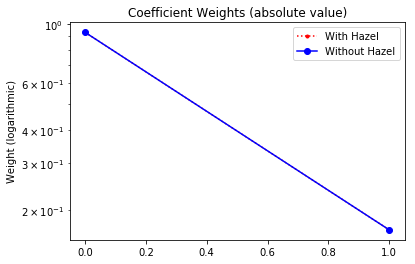

In [9]:
withHazel, = plt.plot([x for x in range(len(coefs))], [coef[1] for coef in coefs], ':r.')
withoutHazel, = plt.plot([x for x in range(len(no_hazel_coefs))], [coef[1] for coef in no_hazel_coefs], '-bo')

plt.legend([withHazel, withoutHazel], ["With Hazel", "Without Hazel"])
plt.title("Coefficient Weights (absolute value)")
plt.ylabel("Weight (logarithmic)")
plt.yscale('log')
plt.savefig("Coefficients_desc.png", dpi=300, transparent=True)
plt.show()